<a href="https://colab.research.google.com/github/snehasri2600/Ocean-Classification/blob/main/Attempt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction and Data Exploration

Going to attempt to merge the datasets from these 2 websites and work with them:

[ArcGIS Map Layer for Classification:](https://data-gis.unep-wcmc.org/portal/home/item.html?id=80567b4443f4457b822f645a2f0d70cf)
This map layer provides a regional classification system for ocean water by realm and biome, depending on the column. Combines 2 datasets in itself -- one from 2007 (MEOW), the other from 2012 (PPOW). Type: shapefile with polygon geometries.

[ECCO Datasets with Ocean Measurements:](https://podaac.jpl.nasa.gov/ECCO?sections=data)
This is a series of datasets provided by NASA with daily and monthly means of different variables. Features will be selected from this dataset to classify ocean realms. For this project, I will use the latest available monthly mean data (December 2017), though one consideration is summer/winter seasons in different hemispheres. A complete time series analysis would be required for more definitive results. Type: netCDF files with latitude, longitude, and time.

Variables:
*   [Atmospheric surface temperature, humidity, wind, and pressure](https://podaac.jpl.nasa.gov/dataset/ECCO_L4_ATM_STATE_05DEG_MONTHLY_V4R4)
*   [Ocean density, stratification, and hydrostatic pressure](https://podaac.jpl.nasa.gov/dataset/ECCO_L4_DENS_STRAT_PRESS_05DEG_DAILY_V4R4)
* If needed: [Ocean temperature and salinity](https://podaac.jpl.nasa.gov/dataset/ECCO_L4_TEMP_SALINITY_05DEG_DAILY_V4R4) (this one is only available as a daily mean, but data is available as individual files for December 2017. I will have to calculate means and put them in the dataset for use.)


In [45]:
pip install gdown

In [46]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [3]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
# Exlporing the classificiation map shapefile dataset

import geopandas as gpd

# Read the unzipped shapefile
# Replace 'your_shapefile_name.shp' with the actual name of the .shp file
ppow_meow = '/content/drive/MyDrive/ColabNotebooks/AdvDataAnalysis/unzipped_shapefile/DataPack-14_001_WCMC036_MEOW_PPOW_2007_2012_v1/01_Data/WCMC-036-MEOW-PPOW-2007-2012.shp'
classification = gpd.read_file(ppow_meow)

# ppow_meow_gdown = "https://drive.google.com/file/d/1tBkiAVTMh3U8Dqx8um4jctk6YoZFt_dt/view?usp=drive_link"
# classification_gdown = gdown.download(ppow_meow_gdown, 'ppow_meow.zip', quiet=False)

#Check coordinate system of GeoDataFrame
print(classification.crs)

# Display the the GeoDataFrame
display(classification)

EPSG:4326


,ECOREGION,REALM,TYPE,PROVINC,BIOME,geometry
0,None,Indo-Pacific Warm Water,PPOW,Agulhas Current,Boundary - western,"POLYGON ((43.38839 -16.53309, 43.3873 -16.5341..."
1,None,Southern Cold Water,PPOW,Antarctic,Polar,"MULTIPOLYGON (((163.70199 -75.37529, 163.70223..."
2,None,Southern Cold Water,PPOW,Antarctic Polar Front,Polar,"POLYGON ((55.95183 -45.49511, 56.04926 -45.514..."
3,None,Northern Cold Water,PPOW,Arctic,Polar,"MULTIPOLYGON (((34.30663 66.4348, 34.30738 66...."
4,None,Atlantic Warm Water,PPOW,Benguela Current,Boundary - eastern,"POLYGON ((11.60732 -15.78272, 11.60734 -15.786..."
...,...,...,...,...,...,...
264,Kermadec Island,Temperate Australasia,MEOW,Northern New Zealand,None,"MULTIPOLYGON (((-178.72257 -31.38881, -178.726..."
265,Northeastern New Zealand,Temperate Australasia,MEOW,Northern New Zealand,None,"MULTIPOLYGON (((174.83125 -36.93422, 174.83127..."
266,Chatham Island,Temperate Australasia,MEOW,Southern New Zealand,None,"POLYGON ((-176.29285 -43.34598, -176.28491 -43..."
267,Central New Zealand,Temperate Australasia,MEOW,Southern New Zealand,None,"MULTIPOLYGON (((175.92912 -44.0954, 175.93876 ..."


In [5]:
print(classification['REALM'].unique())
print(classification['BIOME'].unique())

['Indo-Pacific Warm Water' 'Southern Cold Water' 'Northern Cold Water'
 'Atlantic Warm Water' 'Arctic' 'Temperate Northern Atlantic'
 'Temperate Northern Pacific' 'Tropical Atlantic' 'Western Indo-Pacific'
 'Central Indo-Pacific' 'Eastern Indo-Pacific' 'Tropical Eastern Pacific'
 'Temperate South America' 'Temperate Southern Africa'
 'Temperate Australasia' 'Southern Ocean']
['Boundary - western' 'Polar' 'Boundary - eastern' 'Semi-enclosed sea'
 'Equatorial' 'Gyre' 'Transitional' None]


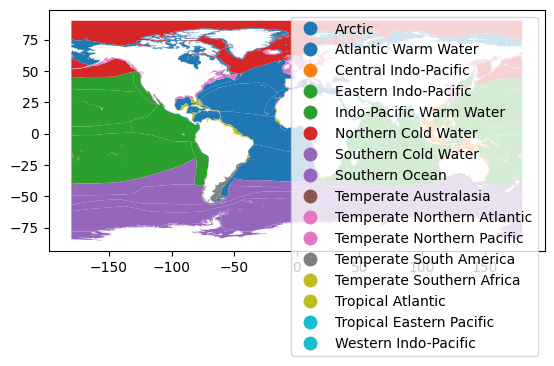

In [6]:
classification.plot(column='REALM', legend=True)
plt.show()

The most descriptive and complete classification is with the 'realm' feature, so I can use that to build a predictive model once the final dataset has been merged and created.

# Converting the Features (Variables) to a DataFrame

In [7]:
# Use xarray to read netCDF files and convert to DataFrames
# Read data: atmospheric surface temperature, humidity, wind, and pressure
import xarray as xr
atm_variables = xr.open_dataset('/content/drive/MyDrive/ColabNotebooks/AdvDataAnalysis/atm_temp_wind_hum_pres.nc')
display(atm_variables)

<xarray.Dataset> Size: 6MB
Dimensions:         (time: 1, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 8B 2017-12-16T06:00:00
  * latitude        (latitude) float32 1kB -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 3kB -179.8 -179.2 -178.8 ... 179.2 179.8
    time_bnds       (time, nv) datetime64[ns] 16B ...
    latitude_bnds   (latitude, nv) float32 3kB ...
    longitude_bnds  (longitude, nv) float32 6kB ...
Dimensions without coordinates: nv
Data variables:
    EXFatemp        (time, latitude, longitude) float32 1MB ...
    EXFaqh          (time, latitude, longitude) float32 1MB ...
    EXFewind        (time, latitude, longitude) float32 1MB ...
    EXFnwind        (time, latitude, longitude) float32 1MB ...
    EXFwspee        (time, latitude, longitude) float32 1MB ...
    EXFpress        (time, latitude, longitude) float32 1MB ...
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on a regular lat-lon grid. ...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            2017-12-31T12:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          2017-12-01T00:00:00
    title:                        ECCO Atmosphere Surface Temperature, Humidi...
    uuid:                         a40f85ae-4158-11eb-a6e9-0cc47a3f8269

In [8]:
# Ocean density, stratification, and hydrostatic pressure
dens_strat_hydropres = xr.open_dataset('/content/drive/MyDrive/ColabNotebooks/AdvDataAnalysis/density_strat_hydropres.nc')
display(dens_strat_hydropres)

<xarray.Dataset> Size: 156MB
Dimensions:         (time: 1, Z: 50, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 8B 2017-12-16T06:00:00
  * Z               (Z) float32 200B -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
  * latitude        (latitude) float32 1kB -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 3kB -179.8 -179.2 -178.8 ... 179.2 179.8
    time_bnds       (time, nv) datetime64[ns] 16B ...
    latitude_bnds   (latitude, nv) float32 3kB ...
    longitude_bnds  (longitude, nv) float32 6kB ...
    Z_bnds          (Z, nv) float32 400B ...
Dimensions without coordinates: nv
Data variables:
    RHOAnoma        (time, Z, latitude, longitude) float32 52MB ...
    DRHODR          (time, Z, latitude, longitude) float32 52MB ...
    PHIHYD          (time, Z, latitude, longitude) float32 52MB ...
Attributes: (12/62)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on a regular lat-lon gri...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               2017-12-31T12:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             2017-12-01T00:00:00
    title:                           ECCO Ocean Density, Stratification, and ...
    uuid:                            109d84b8-415a-11eb-b774-0cc47a3f69ef

In [9]:
#Merging the datasets
all_variables = xr.merge([atm_variables, dens_strat_hydropres])
display(all_variables)

/tmp/ipython-input-2328718939.py:2: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  all_variables = xr.merge([atm_variables, dens_strat_hydropres])
/tmp/ipython-input-2328718939.py:2: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  all_variables = xr.merge([atm_variables, dens_strat_hydropres])
/tmp/ipython-input-2328718939.py:2: FutureWa

<xarray.Dataset> Size: 162MB
Dimensions:         (time: 1, latitude: 360, longitude: 720, nv: 2, Z: 50)
Coordinates:
  * time            (time) datetime64[ns] 8B 2017-12-16T06:00:00
  * latitude        (latitude) float32 1kB -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 3kB -179.8 -179.2 -178.8 ... 179.2 179.8
  * Z               (Z) float32 200B -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
    time_bnds       (time, nv) datetime64[ns] 16B 2017-12-01 2017-12-31T12:00:00
    latitude_bnds   (latitude, nv) float32 3kB -90.0 -89.5 -89.5 ... 89.5 90.0
    longitude_bnds  (longitude, nv) float32 6kB -180.0 -179.5 ... 179.5 180.0
    Z_bnds          (Z, nv) float32 400B ...
Dimensions without coordinates: nv
Data variables:
    EXFatemp        (time, latitude, longitude) float32 1MB ...
    EXFaqh          (time, latitude, longitude) float32 1MB ...
    EXFewind        (time, latitude, longitude) float32 1MB ...
    EXFnwind        (time, latitude, longitude) float32 1MB ...
    EXFwspee        (time, latitude, longitude) float32 1MB ...
    EXFpress        (time, latitude, longitude) float32 1MB ...
    RHOAnoma        (time, Z, latitude, longitude) float32 52MB ...
    DRHODR          (time, Z, latitude, longitude) float32 52MB ...
    PHIHYD          (time, Z, latitude, longitude) float32 52MB ...
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on a regular lat-lon grid. ...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            2017-12-31T12:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          2017-12-01T00:00:00
    title:                        ECCO Atmosphere Surface Temperature, Humidi...
    uuid:                         a40f85ae-4158-11eb-a6e9-0cc47a3f8269

In [10]:
#Converting to DataFrame and unstacking the MultiIndex layers
all_variables_df = all_variables[['EXFatemp', 'EXFaqh','EXFewind','EXFnwind','EXFwspee','EXFpress','RHOAnoma','DRHODR','PHIHYD']].to_dataframe(dim_order = ['time', 'latitude','longitude','Z']).reset_index()
print(all_variables_df.columns)
display(all_variables_df)

Index(['time', 'latitude', 'longitude', 'Z', 'EXFatemp', 'EXFaqh', 'EXFewind',
       'EXFnwind', 'EXFwspee', 'EXFpress', 'RHOAnoma', 'DRHODR', 'PHIHYD'],
      dtype='object')


,time,latitude,longitude,Z,EXFatemp,EXFaqh,EXFewind,EXFnwind,EXFwspee,EXFpress,RHOAnoma,DRHODR,PHIHYD
0,2017-12-16 06:00:00,-89.75,-179.75,-5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-12-16 06:00:00,-89.75,-179.75,-15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-12-16 06:00:00,-89.75,-179.75,-25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-12-16 06:00:00,-89.75,-179.75,-35.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-12-16 06:00:00,-89.75,-179.75,-45.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12959995,2017-12-16 06:00:00,89.75,179.75,-4264.25,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,18.748615,-0.000002,458.823883
12959996,2017-12-16 06:00:00,89.75,179.75,-4640.25,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,NaN,NaN,NaN
12959997,2017-12-16 06:00:00,89.75,179.75,-5039.25,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,NaN,NaN,NaN
12959998,2017-12-16 06:00:00,89.75,179.75,-5461.25,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,NaN,NaN,NaN


# Fitting Features into the Classification File

In [11]:
print(classification['geometry'].unique)

<bound method Series.unique of 0      POLYGON ((43.38839 -16.53309, 43.3873 -16.5341...
1      MULTIPOLYGON (((163.70199 -75.37529, 163.70223...
2      POLYGON ((55.95183 -45.49511, 56.04926 -45.514...
3      MULTIPOLYGON (((34.30663 66.4348, 34.30738 66....
4      POLYGON ((11.60732 -15.78272, 11.60734 -15.786...
                             ...                        
264    MULTIPOLYGON (((-178.72257 -31.38881, -178.726...
265    MULTIPOLYGON (((174.83125 -36.93422, 174.83127...
266    POLYGON ((-176.29285 -43.34598, -176.28491 -43...
267    MULTIPOLYGON (((175.92912 -44.0954, 175.93876 ...
268    MULTIPOLYGON (((178.70294 -49.56415, 178.70525...
Name: geometry, Length: 269, dtype: geometry>


Because the classification dataset has polygons and multipolygons as its geometry, I need to use GeoPandas to conduct a spatial join of the two datasets.

In [12]:
# Creating a geometry column with latitude and longitude values according to a specific coordinate system within all_variables
variable_geometry = gpd.points_from_xy(all_variables_df['latitude'], all_variables_df['longitude'])

# Turning all_variables into a GeoDataFrame in order to merge with the classification dataset (this takes the latitude and longitude columns and turns them into point geometry)
all_variables_gdf = gpd.GeoDataFrame(all_variables_df, geometry=variable_geometry, crs='EPSG:4326')
display(all_variables_gdf)

,time,latitude,longitude,Z,EXFatemp,EXFaqh,EXFewind,EXFnwind,EXFwspee,EXFpress,RHOAnoma,DRHODR,PHIHYD,geometry
0,2017-12-16 06:00:00,-89.75,-179.75,-5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -179.75)
1,2017-12-16 06:00:00,-89.75,-179.75,-15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -179.75)
2,2017-12-16 06:00:00,-89.75,-179.75,-25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -179.75)
3,2017-12-16 06:00:00,-89.75,-179.75,-35.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -179.75)
4,2017-12-16 06:00:00,-89.75,-179.75,-45.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -179.75)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12959995,2017-12-16 06:00:00,89.75,179.75,-4264.25,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,18.748615,-0.000002,458.823883,POINT (89.75 179.75)
12959996,2017-12-16 06:00:00,89.75,179.75,-4640.25,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,NaN,NaN,NaN,POINT (89.75 179.75)
12959997,2017-12-16 06:00:00,89.75,179.75,-5039.25,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,NaN,NaN,NaN,POINT (89.75 179.75)
12959998,2017-12-16 06:00:00,89.75,179.75,-5461.25,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,NaN,NaN,NaN,POINT (89.75 179.75)


In [13]:
#Merging all_variables_gdf with classification using a spatial join
merged_gdf = gpd.sjoin(all_variables_gdf, classification, how='inner', predicate='within')
display(merged_gdf)

,time,latitude,longitude,Z,EXFatemp,EXFaqh,EXFewind,EXFnwind,EXFwspee,EXFpress,RHOAnoma,DRHODR,PHIHYD,geometry,index_right,ECOREGION,REALM,TYPE,PROVINC,BIOME
10700,2017-12-16 06:00:00,-89.75,-72.75,-5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,Amundsen/Bellingshausen Sea,Southern Ocean,MEOW,Continental High Antarctic,None
10701,2017-12-16 06:00:00,-89.75,-72.75,-15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,Amundsen/Bellingshausen Sea,Southern Ocean,MEOW,Continental High Antarctic,None
10702,2017-12-16 06:00:00,-89.75,-72.75,-25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,Amundsen/Bellingshausen Sea,Southern Ocean,MEOW,Continental High Antarctic,None
10703,2017-12-16 06:00:00,-89.75,-72.75,-35.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,Amundsen/Bellingshausen Sea,Southern Ocean,MEOW,Continental High Antarctic,None
10704,2017-12-16 06:00:00,-89.75,-72.75,-45.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,Amundsen/Bellingshausen Sea,Southern Ocean,MEOW,Continental High Antarctic,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12950995,2017-12-16 06:00:00,89.75,89.75,-4264.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,18.748537,-0.000002,458.932983,POINT (89.75 89.75),3,None,Northern Cold Water,PPOW,Arctic,Polar
12950996,2017-12-16 06:00:00,89.75,89.75,-4640.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,NaN,NaN,NaN,POINT (89.75 89.75),3,None,Northern Cold Water,PPOW,Arctic,Polar
12950997,2017-12-16 06:00:00,89.75,89.75,-5039.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,NaN,NaN,NaN,POINT (89.75 89.75),3,None,Northern Cold Water,PPOW,Arctic,Polar
12950998,2017-12-16 06:00:00,89.75,89.75,-5461.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,NaN,NaN,NaN,POINT (89.75 89.75),3,None,Northern Cold Water,PPOW,Arctic,Polar


In [14]:
#Renaming columns so they are more descriptive and understandable
merged_gdf.rename(columns={'EXFatemp':'atm_surface_temp', 'EXFaqh':'atm_surface_humidity', 'EXFewind':'zonal_wind_speed', 'EXFnwind':'meridional_wind_speed', 'EXFwspee':'wind_speed','EXFpress':'atm_surface_pressure', 'Z':'depth'}, inplace=True)
merged_gdf.rename(columns={'RHOAnoma':'seawater_density_anomaly', 'DRHODR':'density_stratification', 'PHIHYD':'hydrostatic_pressure_anomaly'}, inplace=True)
merged_gdf.rename(columns={'REALM':'realm', 'BIOME':'biome', 'ECOREGION':'ecoregion','Z':'depth', 'PROVINC':'province'}, inplace=True)
display(merged_gdf)

,time,latitude,longitude,depth,atm_surface_temp,atm_surface_humidity,zonal_wind_speed,meridional_wind_speed,wind_speed,atm_surface_pressure,seawater_density_anomaly,density_stratification,hydrostatic_pressure_anomaly,geometry,index_right,ecoregion,realm,TYPE,province,biome
10700,2017-12-16 06:00:00,-89.75,-72.75,-5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,Amundsen/Bellingshausen Sea,Southern Ocean,MEOW,Continental High Antarctic,None
10701,2017-12-16 06:00:00,-89.75,-72.75,-15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,Amundsen/Bellingshausen Sea,Southern Ocean,MEOW,Continental High Antarctic,None
10702,2017-12-16 06:00:00,-89.75,-72.75,-25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,Amundsen/Bellingshausen Sea,Southern Ocean,MEOW,Continental High Antarctic,None
10703,2017-12-16 06:00:00,-89.75,-72.75,-35.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,Amundsen/Bellingshausen Sea,Southern Ocean,MEOW,Continental High Antarctic,None
10704,2017-12-16 06:00:00,-89.75,-72.75,-45.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,Amundsen/Bellingshausen Sea,Southern Ocean,MEOW,Continental High Antarctic,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12950995,2017-12-16 06:00:00,89.75,89.75,-4264.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,18.748537,-0.000002,458.932983,POINT (89.75 89.75),3,None,Northern Cold Water,PPOW,Arctic,Polar
12950996,2017-12-16 06:00:00,89.75,89.75,-4640.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,NaN,NaN,NaN,POINT (89.75 89.75),3,None,Northern Cold Water,PPOW,Arctic,Polar
12950997,2017-12-16 06:00:00,89.75,89.75,-5039.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,NaN,NaN,NaN,POINT (89.75 89.75),3,None,Northern Cold Water,PPOW,Arctic,Polar
12950998,2017-12-16 06:00:00,89.75,89.75,-5461.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,NaN,NaN,NaN,POINT (89.75 89.75),3,None,Northern Cold Water,PPOW,Arctic,Polar


In [15]:
# Making sure nothing is misunderstood from the dataset
print(merged_gdf['time'].unique())

<DatetimeArray>
['2017-12-16 06:00:00']
Length: 1, dtype: datetime64[ns]


There is only one datetime value across the board for all data, so that "variable" is obsolete (as expected).

Additionally, certain variables cannot be used to build a machine learning model. For example, using latitude, longitude, or geometry would make the model obsolete, since the ocean has been specifically classified by location.

In [16]:
# Converting to a regular DataFrame
merged_df = pd.DataFrame(merged_gdf)
display(merged_df)

,time,latitude,longitude,depth,atm_surface_temp,atm_surface_humidity,zonal_wind_speed,meridional_wind_speed,wind_speed,atm_surface_pressure,seawater_density_anomaly,density_stratification,hydrostatic_pressure_anomaly,geometry,index_right,ecoregion,realm,TYPE,province,biome
10700,2017-12-16 06:00:00,-89.75,-72.75,-5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,Amundsen/Bellingshausen Sea,Southern Ocean,MEOW,Continental High Antarctic,None
10701,2017-12-16 06:00:00,-89.75,-72.75,-15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,Amundsen/Bellingshausen Sea,Southern Ocean,MEOW,Continental High Antarctic,None
10702,2017-12-16 06:00:00,-89.75,-72.75,-25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,Amundsen/Bellingshausen Sea,Southern Ocean,MEOW,Continental High Antarctic,None
10703,2017-12-16 06:00:00,-89.75,-72.75,-35.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,Amundsen/Bellingshausen Sea,Southern Ocean,MEOW,Continental High Antarctic,None
10704,2017-12-16 06:00:00,-89.75,-72.75,-45.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,Amundsen/Bellingshausen Sea,Southern Ocean,MEOW,Continental High Antarctic,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12950995,2017-12-16 06:00:00,89.75,89.75,-4264.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,18.748537,-0.000002,458.932983,POINT (89.75 89.75),3,None,Northern Cold Water,PPOW,Arctic,Polar
12950996,2017-12-16 06:00:00,89.75,89.75,-4640.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,NaN,NaN,NaN,POINT (89.75 89.75),3,None,Northern Cold Water,PPOW,Arctic,Polar
12950997,2017-12-16 06:00:00,89.75,89.75,-5039.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,NaN,NaN,NaN,POINT (89.75 89.75),3,None,Northern Cold Water,PPOW,Arctic,Polar
12950998,2017-12-16 06:00:00,89.75,89.75,-5461.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,NaN,NaN,NaN,POINT (89.75 89.75),3,None,Northern Cold Water,PPOW,Arctic,Polar


In [17]:
# Drop time, latitude, longitude, and geometry columns
merged_df = merged_df.drop(['time', 'latitude', 'longitude', 'geometry'], axis=1)

# Dropping categorical variables we don't want
merged_df = merged_df.drop(['ecoregion', 'province', 'TYPE', 'biome','index_right'], axis=1)

We now have a decent dataset to work with. But we still haven't dealt with the repeating and different depth measurements in our dataset.

In [18]:
# # Checking all depth measurements we have
print(merged_df['depth'].unique())
print(merged_df['depth'].min())
print(merged_df['depth'].max())

# # Since many of our variables are atmosphere-related, a low depth could be useful for this model. We will filter the data so we only have data that is measured at a -5.0ft depth.
merged_df = merged_df[merged_df['depth'] == -5.0]

# # We can now safely drop the depth variable from our dataset
merged_df = merged_df.drop(['depth'], axis=1)
display(merged_df)

[-5.000000e+00 -1.500000e+01 -2.500000e+01 -3.500000e+01 -4.500000e+01
 -5.500000e+01 -6.500000e+01 -7.500500e+01 -8.502500e+01 -9.509500e+01
 -1.053100e+02 -1.158700e+02 -1.271500e+02 -1.397400e+02 -1.544700e+02
 -1.724000e+02 -1.947350e+02 -2.227100e+02 -2.574700e+02 -2.999300e+02
 -3.506800e+02 -4.099300e+02 -4.774700e+02 -5.527100e+02 -6.347350e+02
 -7.224000e+02 -8.144700e+02 -9.097400e+02 -1.007155e+03 -1.105905e+03
 -1.205535e+03 -1.306205e+03 -1.409150e+03 -1.517095e+03 -1.634175e+03
 -1.765135e+03 -1.914150e+03 -2.084035e+03 -2.276225e+03 -2.491250e+03
 -2.729250e+03 -2.990250e+03 -3.274250e+03 -3.581250e+03 -3.911250e+03
 -4.264250e+03 -4.640250e+03 -5.039250e+03 -5.461250e+03 -5.906250e+03]
-5906.25
-5.0


,atm_surface_temp,atm_surface_humidity,zonal_wind_speed,meridional_wind_speed,wind_speed,atm_surface_pressure,seawater_density_anomaly,density_stratification,hydrostatic_pressure_anomaly,realm
10700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southern Ocean
10750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southern Ocean
10800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southern Cold Water
10850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southern Cold Water
10900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southern Cold Water
...,...,...,...,...,...,...,...,...,...,...
12950750,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,Northern Cold Water
12950800,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,Northern Cold Water
12950850,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,Northern Cold Water
12950900,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,Northern Cold Water


The final dataset is now a DataFrame with all necessary variables for machine learning. I can now import scikitlearn and begin data splitting and preprocessing for the model.

# Data Preprocessing

In [19]:
pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 43.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [20]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [21]:
# Define features (X) and target (y)

# Dropping 'realm' from the features column so we can use all other variables as features, and label the target as the 'realm'
X = merged_df.drop(['realm'], axis=1)
y = merged_df['realm']

# Split into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [22]:
# Exploring the training set
print(X_train.info())
print(X_train.describe())
print()
print(y_train.info())
print(y_train.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 59457 entries, 4047500 to 7108750
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   atm_surface_temp              39080 non-null  float32
 1   atm_surface_humidity          39080 non-null  float32
 2   zonal_wind_speed              39080 non-null  float32
 3   meridional_wind_speed         39080 non-null  float32
 4   wind_speed                    39080 non-null  float32
 5   atm_surface_pressure          39080 non-null  float32
 6   seawater_density_anomaly      39080 non-null  float32
 7   density_stratification        39080 non-null  float32
 8   hydrostatic_pressure_anomaly  39080 non-null  float32
dtypes: float32(9)
memory usage: 2.5 MB
None
       atm_surface_temp  atm_surface_humidity  zonal_wind_speed  \
count      39080.000000          39080.000000      39080.000000   
mean         284.782959              0.008930          0.3563

We can now use the OneHotEncoder on the target for this model.

In [23]:
ohe = OneHotEncoder(sparse_output=False)

# Reshape y_train and y_test to be 2D arrays
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# OneHotEncoder on y_train and y_test data
y_train_encoded = ohe.fit_transform(y_train_reshaped)
y_test_encoded = ohe.transform(y_test_reshaped)

# Handling Missing Values

In [24]:
# Checking NaN values
print(f"X_train NaN count: {X_train.isna().sum()}")
print(f"y_train NaN count: {y_train.isna().sum()}")

X_train NaN count: atm_surface_temp                20377
atm_surface_humidity            20377
zonal_wind_speed                20377
meridional_wind_speed           20377
wind_speed                      20377
atm_surface_pressure            20377
seawater_density_anomaly        20377
density_stratification          20377
hydrostatic_pressure_anomaly    20377
dtype: int64
y_train NaN count: 0


There are lots of NaN values in our feature variables. However, all the variables have the same number of missing values.

In [26]:
# Finding where the missing values are located
missing_values = X_train[X_train.isna().any(axis=1)]
display(missing_values)

,atm_surface_temp,atm_surface_humidity,zonal_wind_speed,meridional_wind_speed,wind_speed,atm_surface_pressure,seawater_density_anomaly,density_stratification,hydrostatic_pressure_anomaly
527800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10214050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4152500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9206700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10358100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
338500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10134300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10537000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7144900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Since we are working with a very large dataset, getting rid of rows with missing values seems fine.
# Applying the process to the training and test sets
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train.loc[X_train_cleaned.index]
X_test_cleaned = X_test.dropna()
y_test_cleaned = y_test.loc[X_test_cleaned.index]

In [38]:
# Checking shapes to see if we still have enough data points for a statistically sound model
print(X_train_cleaned.shape)
print(y_train_cleaned.shape)
print(X_test_cleaned.shape)
print(y_test_cleaned.shape)

(39080, 9)
(39080,)
(13129, 9)
(13129,)


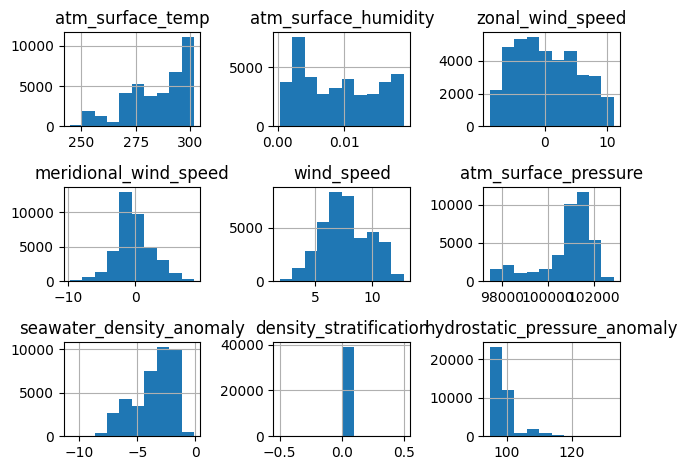

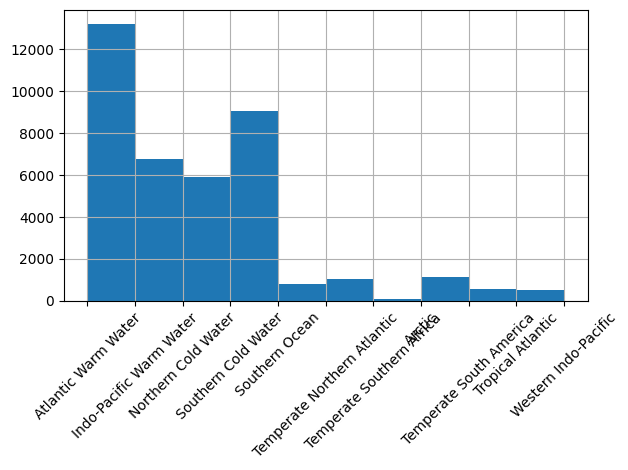

In [42]:
# Visualizing training set data
X_train_cleaned.hist()
plt.tight_layout()
plt.show()
y_train_cleaned.hist()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


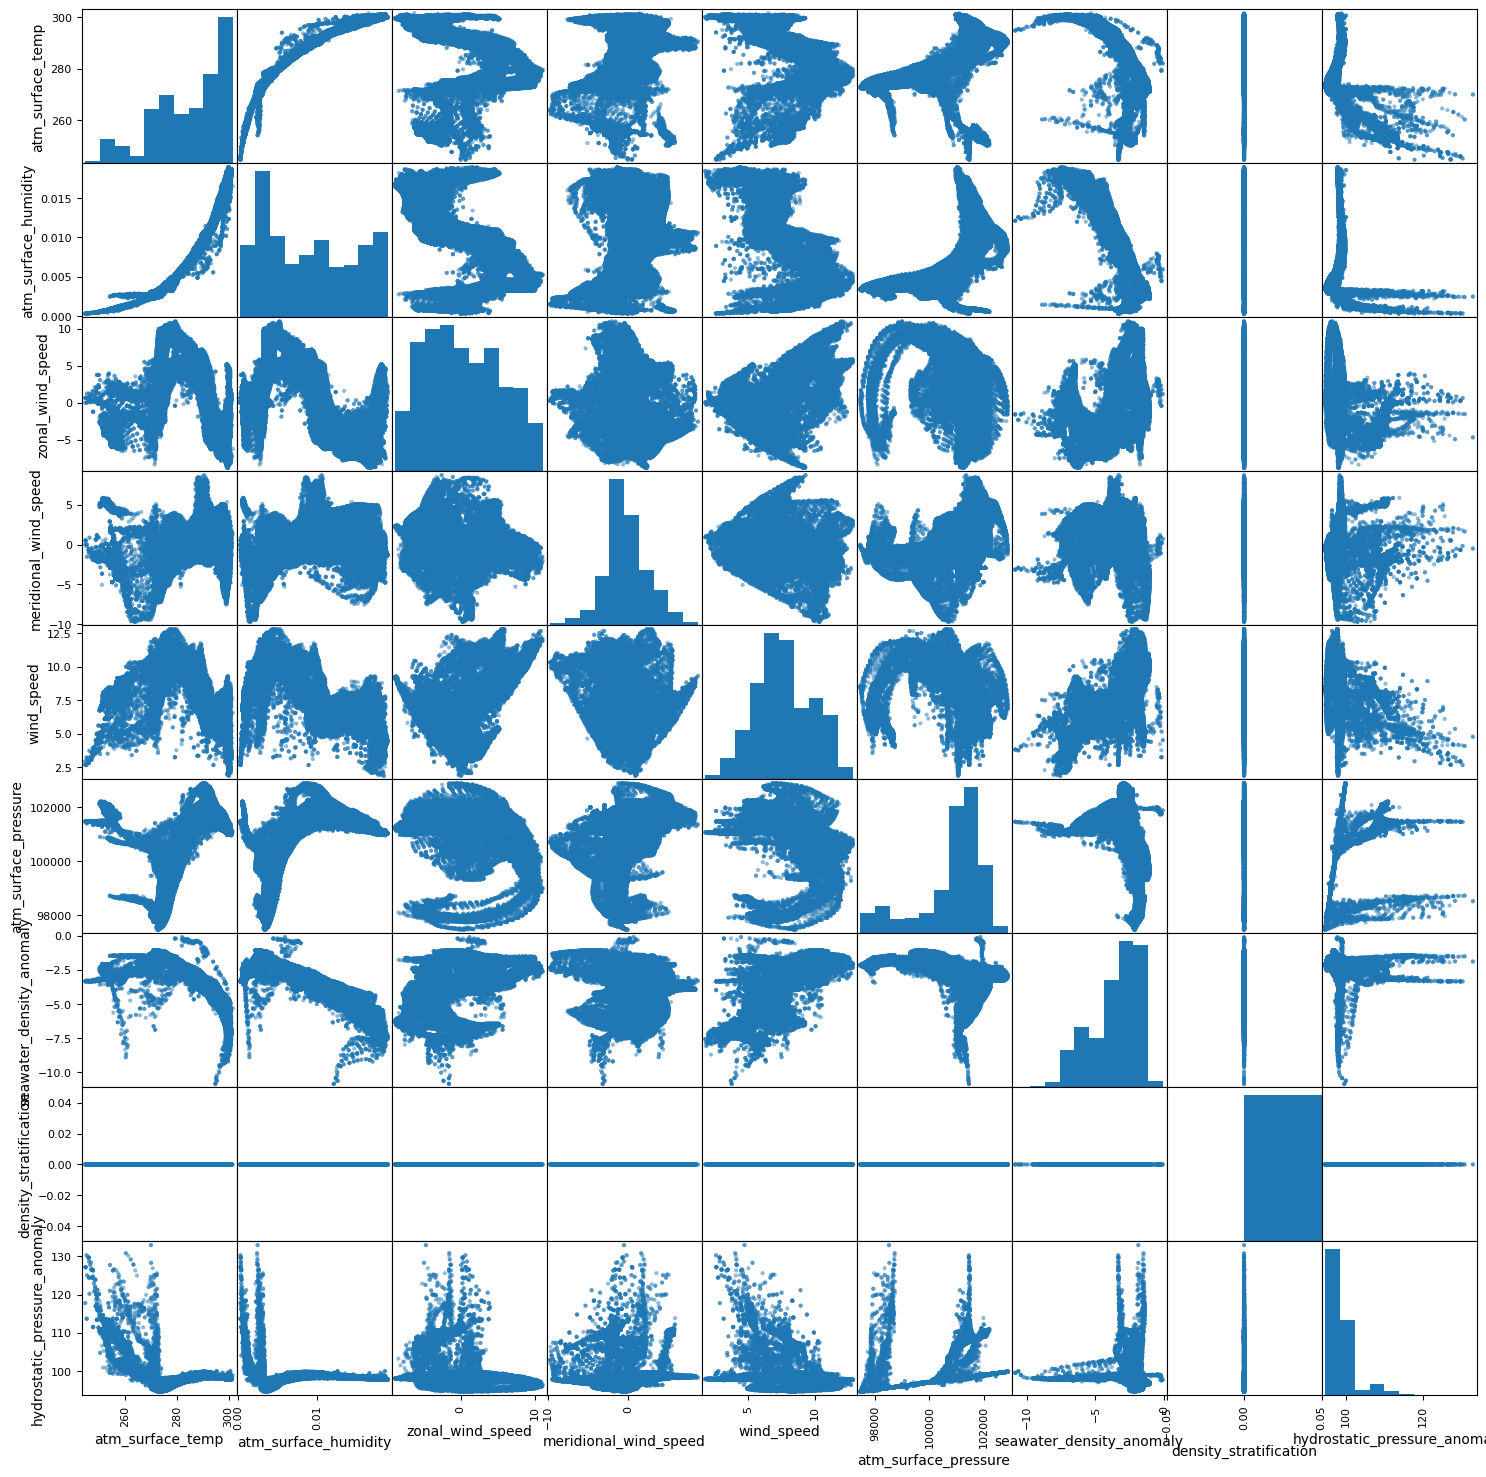

In [44]:
# Visualization cont.
pd.plotting.scatter_matrix(X_train_cleaned, figsize=(18, 18))
plt.show()

In [51]:
#Looking at the histograms, we may need to normalize atm_surface_temp, atm_surface_pressue, seawater_density_anomaly, and hydrostatic_pressure_anomaly